###

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mticker


**Первый взгляд на датасет**

In [4]:
data_path = '_data.csv'
df = pd.read_csv(data_path,)
df = df.iloc[:, 1:]
df.head(5)


,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [5]:
pd.set_option('display.max_columns', 70)

In [6]:
df.shape

(23368, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID  объявления            23368 non-null  int64  
 1   Количество комнат         22327 non-null  object 
 2   Тип                       23368 non-null  object 
 3   Метро                     22053 non-null  object 
 4   Адрес                     23368 non-null  object 
 5   Площадь, м2               23368 non-null  object 
 6   Дом                       23368 non-null  object 
 7   Парковка                  9951 non-null   object 
 8   Цена                      23368 non-null  object 
 9   Телефоны                  23368 non-null  object 
 10  Описание                  23368 non-null  object 
 11  Ремонт                    20613 non-null  object 
 12  Площадь комнат, м2        14458 non-null  object 
 13  Балкон                    15390 non-null  object 
 14  Окна  

In [8]:
df.describe(include='all')

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
count,2.336800e+04,22327,23368,22053,23368,23368,23368,9951,23368,23368,23368,20613,14458,15390,16755,20696,17272,23011,5848,2163,11206.00000,17868,12846,23368
unique,NaN,24,1,5866,12850,11255,2565,5,3922,13172,23078,4,3990,18,3,20,3,528,1798,393,NaN,34,2,23368
top,NaN,1,Квартира,м. Академическая (10 мин пешком),"Москва, Чапаевский переулок, 3",40.0/20.0/10.0,"3/5, Кирпичный",наземная,"40000.0 руб./ За месяц, Залог - 40000 руб., Ко...",+79819217172,0,Косметический,20,Балкон (1),Во двор,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...","Символ, 2019",индивидуальный проект,NaN,Пасс (1),Да,https://www.cian.ru/rent/flat/274672243
freq,NaN,7917,23368,41,63,224,322,6043,1113,302,108,8499,1620,7428,10870,10078,10134,2896,61,615,NaN,5911,10897,1
mean,2.676265e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98345,NaN,NaN,NaN
std,1.876862e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.61472,NaN,NaN,NaN
min,1.072986e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.20000,NaN,NaN,NaN
25%,2.712663e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.64000,NaN,NaN,NaN
50%,2.739030e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.64000,NaN,NaN,NaN
75%,2.746872e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80000,NaN,NaN,NaN


In [9]:
df.nunique().to_frame()

,0
ID объявления,23368
Количество комнат,24
Тип,1
Метро,5866
Адрес,12850
"Площадь, м2",11255
Дом,2565
Парковка,5
Цена,3922
Телефоны,13172


In [10]:
df.columns

Index(['ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес',
       'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание',
       'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

**Первичная обработка датафрейма**

In [11]:
# Заменим названия колонок на английские
df.rename(columns={
    'ID  объявления': 'listing_id',
    'Количество комнат': 'num_rooms',
    'Тип': 'type',
    'Метро': 'metro',
    'Адрес': 'address',
    'Площадь, м2': 'square_meters',
    'Дом': 'building',
    'Парковка': 'parking',
    'Цена': 'price',
    'Телефоны': 'phones',
    'Описание': 'description',
    'Ремонт': 'renovation',
    'Площадь комнат, м2': 'room_area_meters',
    'Балкон': 'balcony',
    'Окна': 'windows',
    'Санузел': 'bathroom',
    'Можно с детьми/животными': 'pets_allowed',
    'Дополнительно': 'additional',
    'Название ЖК': 'housing_complex',
    'Серия дома': 'building_series',
    'Высота потолков, м': 'ceiling_height',
    'Лифт': 'elevator',
    'Мусоропровод': 'garbage_chute',
    'Ссылка на объявление': 'listing_link'}, inplace=True)

In [12]:
df.columns

Index(['listing_id', 'num_rooms', 'type', 'metro', 'address', 'square_meters',
       'building', 'parking', 'price', 'phones', 'description', 'renovation',
       'room_area_meters', 'balcony', 'windows', 'bathroom', 'pets_allowed',
       'additional', 'housing_complex', 'building_series', 'ceiling_height',
       'elevator', 'garbage_chute', 'listing_link'],
      dtype='object')

In [13]:
# Посмотрим на число NaN-ов в каждой колоноке датафрейма
count_of_na = df.isna().sum()
count_of_na.to_frame()


,0
listing_id,0
num_rooms,1041
type,0
metro,1315
address,0
square_meters,0
building,0
parking,13417
price,0
phones,0


In [14]:
df.dtypes

listing_id            int64
num_rooms            object
type                 object
metro                object
address              object
square_meters        object
building             object
parking              object
price                object
phones               object
description          object
renovation           object
room_area_meters     object
balcony              object
windows              object
bathroom             object
pets_allowed         object
additional           object
housing_complex      object
building_series      object
ceiling_height      float64
elevator             object
garbage_chute        object
listing_link         object
dtype: object

**Формирование корректного датафрема**  

In [15]:
# В фиче num_rooms оставляем только число комнат
df['num_rooms'] = df['num_rooms'].astype(str).apply(lambda x: x[0])
df.loc[df['num_rooms'] == 'n', 'num_rooms'] = np.nan
df['num_rooms'] = pd.to_numeric(df['num_rooms'])

In [16]:
# В square_meters берем самое больше число в ячейке, распределение кв.м. по квартире игнорируем
df['square_meters'] = df['square_meters'].astype(str).apply(lambda x: max([float(i) for i in x.split('/')]))
# list(df['square_meters'].unique())

In [17]:
df.head(4)

,listing_id,num_rooms,type,metro,address,square_meters,building,parking,price,phones,description,renovation,room_area_meters,balcony,windows,bathroom,pets_allowed,additional,housing_complex,building_series,ceiling_height,elevator,garbage_chute,listing_link
0,271271157,4.0,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4.0,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,4.0,Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,4.0,Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456


*Разобтем фичу building на 3 колонки*

In [18]:
# Фича house_size - этажность дома, в котором находится квартира
df['house_size'] = df['building'].astype(str).apply(lambda x: x.split(',')[0][x.split(',')[0].find('/') + 1: ])
df.loc[df['house_size'] == 'nan', 'house_size'] = np.nan
df['house_size'] = pd.to_numeric(df['house_size'])
df['house_size']
# df[df['house_size'] == 1]
# list(df['house_size'].unique())

0        16
1        16
2        16
3         6
4        26
         ..
23363    14
23364    18
23365     5
23366    23
23367    23
Name: house_size, Length: 23368, dtype: int64

In [19]:
# Этаж, на котором находится квартира
# При формировании этой колонки был однаружен один выброс - квартира на -1 этаже, 
# было решено, что это опечтка, квартире присвоен 1-ый этаж
df['flat_floor'] = df['building'].astype(str).apply(lambda x: x.split(',')[0][:x.split(',')[0].find('/')])
df.loc[df['flat_floor'] == 'na', 'flat_floor'] = np.nan
df['flat_floor'] = pd.to_numeric(df['flat_floor'])
df.loc[df['flat_floor'] == -1, 'flat_floor'] = 1

In [20]:
# Для type_of_building "вытащили" тип здания, где его нет - Nan
df['type_of_building'] = df['building'].astype(str).apply(lambda x: np.nan if x.find(',') == -1 else x[x.find(',') + 1:])
list(df['type_of_building'].unique())
# df[df['type_of_building'] == 'nan']

[' Монолитный',
 ' Монолитно-кирпичный',
 nan,
 ' Панельный',
 ' Сталинский',
 ' Кирпичный',
 ' старый фонд',
 ' Блочный',
 ' Деревянный',
 ' Газобетонный блок',
 ' Щитовой']

In [21]:
# Фича parking не требует обработки
list(df['parking'].unique())
list(df['parking'].unique())

['подземная', nan, 'наземная', 'открытая', 'многоуровневая', 'на крыше']

*Разобьем колонку price на несколько более информативных колонок и обработаем их*

In [22]:
# При формировании цены за месяц было обнаружено, что в данных есть стоимости 
# квартир в долларах и евро, решили конверитровать стоимость квартиры в валюте в рубли по текущему курсу
# Функция для колонки цены за месяц
def month_price(price):
    if '$' in price.split('/')[0]:
        return float(price.split('/')[0][:price.split('/')[0].find('$')]) * 96.95
    elif '€' in price.split('/')[0]:
        return float(price.split('/')[0][:price.split('/')[0].find('$')]) * 106.42
    else:
        return price.split('/')[0][:price.split('/')[0].find('р')]
    

In [23]:
# Формирование фичи price_per_month
df['price_per_month'] = df['price'].astype(str).apply(month_price)
df.loc[df['price_per_month'] == 'na', 'price_per_month'] = np.nan
df['price_per_month'] = pd.to_numeric(df['price_per_month'])
df['price_per_month']

0        500000.0
1        500000.0
2        500000.0
3        400000.0
4        225000.0
           ...   
23363     42000.0
23364     45000.0
23365     50000.0
23366     55000.0
23367     57000.0
Name: price_per_month, Length: 23368, dtype: float64

In [24]:
# Функция для извлечения суммы депозита по квартире
# Конвертация в рубли происходит по принципу фичи price_per_month
def deposit(dep):
    out_dep = ''
    for i in dep.split(','):
        if "Залог" in i:
            if '$'in i:
                out_dep += str(float(i[i.find('-') + 1: i.find('$')]) * 96.95)
            elif '€' in i:
                out_dep += str(float(i[i.find('-') + 1: i.find('€')]) * 106.42)
            else:
                out_dep += i[i.find('-') + 1: i.find('р')]
    return out_dep

In [25]:

df.iloc[10127]['price']

'37000.0 руб./ За месяц, Сумма коммунальных платежей - 5000.0 руб., Залог - 1 руб., Срок аренды - Длительный, Предоплата 1 мес'

In [26]:
# При формировании фичи deposit, обнаружили очевидные выбросы, наиболее яркие 
# примеры ниже в датафрейме
df['deposit'] = df['price'].astype(str).apply(deposit)
df['deposit'] = pd.to_numeric(df['deposit'])
df[df['deposit'] > 10000000]
list(df['deposit'].unique())
df['deposit']

0        500000.0
1        500000.0
2        500000.0
3        400000.0
4        225000.0
           ...   
23363     42000.0
23364     45000.0
23365     50000.0
23366     50000.0
23367     60000.0
Name: deposit, Length: 23368, dtype: float64

In [27]:
# Функция для извлечения суммы коммунальных платежей по квартире
# Решили, что если коммунальные платежи включены в стоимость аренды квартиры,
# то в данной колонке они равны 0
# Также обнаружили, что для квартир "в валюте" коммуннальные платежи включены 
# в стоимость, следовательно, они не нуждаются в конвертации
def util_bills(ut_bill):
    bill_str = ''
    for i in ut_bill.split(','):
        if 'Коммунальные услуги включены' in i:
            bill_str += '0'
        elif 'Сумма коммунальных платежей' in i:
            bill_str += i[i.find('-') + 1 : i.find('р')]
    return bill_str        

In [28]:
df[df['price'].astype(str).str.contains('€')]['price'].to_list()

['12000.0 €/ За месяц, Залог - 12000 €, Срок аренды - Длительный',
 '9800.0 €/ За месяц, Залог - 9800 €, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '8081.0 €/ За месяц, Залог - 8081 €, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 €/ За месяц, Залог - 10000 €, Срок аренды - Длительный, Предоплата 1 мес',
 '9000.0 €/ За месяц, Залог - 9000 €, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '11000.0 €/ За месяц, Залог - 100 €, Срок аренды - Длительный',
 '9000.0 €/ За месяц, Залог - 9000 €, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 €/ За месяц, Залог - 10000 €, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 €/ За месяц, Залог - 10000 €, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 €/ За месяц, Залог - 10000 €, Срок аренды - Длительный, Предоплата 1 мес']

In [29]:
df[df['price'].astype(str).str.contains(r'\$')]['price'].to_list()

['5000.0 $/ За месяц, Залог - 5409 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '5000.0 $/ За месяц, Залог - 5000 $, Срок аренды - Длительный, Предоплата 1 мес',
 '5000.0 $/ За месяц, Залог - 5000 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '5000.0 $/ За месяц, Залог - 5000 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 $/ За месяц, Залог - 10000 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 $/ За месяц, Залог - 10000 $, Срок аренды - Длительный',
 '25000.0 $/ За месяц, Залог - 25000 $, Срок аренды - Длительный, Предоплата 1 мес',
 '25000.0 $/ За месяц, Залог - 25000 $, Срок аренды - Длительный, Предоплата 1 мес',
 '5000.0 $/ За месяц, Залог - 5000 $, Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес',
 '10638.0 $/ За месяц, Залог - 10638 $, Срок аренды - Длительный, Предоплата 1 мес',
 '10000.0 $/ За месяц, Залог

In [30]:
# При формировании фичи utility_bills было обнаружено, что в некоторых данных есть 
# и цена на коммунальные услуги, и инфа, то что ком.услуги включены в стоимость, из-за чего функция работала некорректно,
# поэтому мы применили еще одну функцию, которая решает эту проблему
df['utility_bills'] = df['price'].astype(str).apply(util_bills)
df['utility_bills'] = df['utility_bills'].apply(lambda x: x.strip()[:x.find(' ')] if ' ' in x.strip() else x.strip())
df.loc[df['utility_bills'] == '','utility_bills'] = np.nan
df['utility_bills'] = pd.to_numeric(df['utility_bills'])

In [31]:
df.loc[1102]['price']

'90000.0 руб./ За месяц, Сумма коммунальных платежей - 8000.0 руб., Залог - 90000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес'

In [32]:
# Функция для фичи "срок аренды"
def rental_per(rental):
    rental_str = ''
    for i in rental.split(','):
        if 'Срок аренды' in i:
            rental_str += i[i.find('-') + 2:]
    return rental_str

In [33]:
df['rental_period'] = df['price'].astype(str).apply(rental_per)

In [34]:
def prepayment(payment):
    pay_str = ''
    for i in payment.split(','):
        if 'Предоплата' in i:
            pay_str += i[-5]
    return pay_str

In [35]:
# Формирование фичи по сроку предоплаты
df['prepayment'] = df['price'].astype(str).apply(prepayment)
df.loc[df['prepayment'] == '', 'prepayment'] = np.nan
df['prepayment'] = pd.to_numeric(df['prepayment'])
list(df['prepayment'].unique())

[np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(nan),
 np.float64(6.0)]

In [36]:
# Оставяем в датафрейме только название станции метро
df['metro2'] = df['metro'].astype(str).apply(lambda x: x[:x.find('(') -1] )
list(df['metro'].unique())
df[df['metro2'] == 'n']
df.loc[df['metro2'] == 'n', 'metro2'] = np.nan
list(df['metro2'].unique())
# list(df['metro2'].unique())
# df[df['metro'] == 'м. ']


['м. Смоленская',
 'м. Арбатская',
 'м. Кропоткинская',
 'м. Александровский сад',
 'м. Киевская',
 'м. Библиотека им. Ленина',
 'м. Боровицкая',
 'м. Баррикадная',
 'м. Краснопресненская',
 nan,
 'м. Марк',
 'м. Алтуфьево',
 'м. Новодачная',
 'м. Долгопрудная',
 'м. Ховрино',
 'м. Селигерская',
 'м. Лианозово',
 'м. Достоевская',
 'м. Кузнецкий мост',
 'м. Сухаревская',
 'м. Проспект Мира',
 'м. Цветной бульвар',
 'м. Трубная',
 'м. Комсомольская',
 'м. Рижская',
 'м. Сретенский бульвар',
 'м. Тургеневская',
 'м. Марьина роща',
 'м. Коломенская',
 'м. Кожуховская',
 'м. Депо',
 'м. Технопарк',
 'м. Печатники',
 'м. Ленинский проспект',
 'м. Автозаводская',
 'м. Пражская',
 'м. Алма-Атинская',
 'м. Улица Академика Янгеля',
 'м. Зябликово',
 'м. Царицыно',
 'м. Тульская',
 'м. Шипиловская',
 'м. Кантемировская',
 'м. Орехово',
 'м. Дубровка',
 'м. ЗИЛ',
 'м. Чертановская',
 'м. Каховская',
 'м. Павелецкая',
 'м. Нагорная',
 'м. Нахимовский проспект',
 'м. Каширская',
 'м. Крымская',
 'м

In [37]:
# Функция для извлечения количества балконов
def extract_balcony(value):
    if pd.isna(value):
        return 0
    parts = value.split(', ')
    for part in parts:
        if 'Балкон' in part:
            return int(part.split('(')[1].replace(')', ''))
    return 0

# Функция для извлечения количества лоджий
def extract_loggia(value):
    if pd.isna(value):
        return 0
    parts = value.split(', ')
    for part in parts:
        if 'Лоджия' in part:
            return int(part.split('(')[1].replace(')', ''))
    return 0

df['balcony_count'] = df['balcony'].apply(extract_balcony)
df['loggia_count'] = df['balcony'].apply(extract_loggia)

df.drop(columns=['balcony'], inplace=True)

In [38]:
# Bathroom
def extract_combined_bathroom(value):
    if pd.isna(value):
        return 0
    if 'Совмещенный' in value:
        return int(''.join(filter(str.isdigit, value.split('Совмещенный ')[1].split(' ')[0])))
    return 0

def extract_separated_bathroom(value):
    if pd.isna(value):
        return 0
    if 'Раздельный' in value:
        return int(''.join(filter(str.isdigit, value.split('Раздельный ')[1].split(' ')[0])))
    return 0

df['combined_bathroom_count'] = df['bathroom'].apply(extract_combined_bathroom)
df['separated_bathroom_count'] = df['bathroom'].apply(extract_separated_bathroom)

df.drop(columns=['bathroom'], inplace=True)

In [39]:
# Windows
def process_windows(value):
    if pd.isna(value):
        return (0, 0)
    if value == 'На улицу и двор':
        return (1, 1)
    elif value == 'Во двор':
        return (0, 1)
    elif value == 'На улицу':
        return (1, 0)
    return (0, 0)


df[['windows_street', 'windows_yard']] = df['windows'].apply(lambda x: pd.Series(process_windows(x)))


df = df.drop('windows', axis=1)

In [40]:
# Pets Allowed
def kids_and_pets(value):
    if pd.isna(value):
        return (0, 0)  # Если NaN, то ставим 0 и 0
    if value == 'Можно с детьми, Можно с животными':
        return (1, 1)
    elif value == 'Можно с животными':
        return (0, 1)
    elif value == 'Можно с детьми':
        return (1, 0)
    return (0, 0)

# Применение функции и создание двух новых столбцов
df[['kids_allowded', 'pets_allowded']] = df['pets_allowed'].apply(lambda x: pd.Series(kids_and_pets(x)))

# Удаление оригинальной колонки pets_allowed
df = df.drop('pets_allowed', axis=1)

In [41]:
# Additional
# Словарь для перевода названий на английский
translation_dict = {
    'Мебель в комнатах': 'is_furniture_in_rooms',
    'Мебель на кухне': 'is_furniture_in_kitchen',
    'Ванна': 'is_bathtub',
    'Душевая кабина': 'is_shower',
    'Стиральная машина': 'is_washing_machine',
    'Кондиционер': 'is_air_conditioner',
    'Посудомоечная машина': 'is_dishwasher',
    'Телевизор': 'is_tv',
    'Холодильник': 'is_fridge',
    'Интернет': 'is_internet',
    'Телефон': 'is_phone'
}

all_items = set()

# Проходим по каждой строке, чтобы выделить уникальные элементы
for items in df['additional'].dropna():
    for item in items.split(', '):
        all_items.add(item)

# Преобразуем список уникальных значений
all_items = list(all_items)

# Для каждого уникального значения создаем отдельную колонку в таблице с переводом
for item in all_items:
    if item in translation_dict:
        english_name = translation_dict[item]
        df[english_name] = df['additional'].apply(lambda x: 1 if pd.notna(x) and item in x else 0)
    else:
        # Если нет перевода, используем оригинальное название
        english_name = item.lower().replace(' ', '_')
        df[english_name] = df['additional'].apply(lambda x: 1 if pd.notna(x) and item in x else 0)

# Удаляем колонку 'additional'
df = df.drop('additional', axis=1)

In [42]:
# Ceiling_height
# Заполняем пропущенные значения медианой
median_ceiling_height = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(median_ceiling_height)

# Преобразуем все значения в float
df['ceiling_height'] = df['ceiling_height'].astype(float)

In [43]:
# Elevator
# Функция для извлечения вместимости пассажирского лифта
def extract_passenger_elevator(value):
    if pd.isna(value):
        return 0
    if 'Пасс' in value:
        return int(value.split('Пасс (')[1].split(')')[0])
    return 0

# Функция для извлечения вместимости грузового лифта
def extract_cargo_elevator(value):
    if pd.isna(value):
        return 0
    if 'Груз' in value:
        return int(value.split('Груз (')[1].split(')')[0])
    return 0

df['passenger_elevator_capacity'] = df['elevator'].apply(extract_passenger_elevator)
df['cargo_elevator_capacity'] = df['elevator'].apply(extract_cargo_elevator)

df.drop('elevator', axis=1, inplace=True)

In [44]:
#Garbage_chute
df['garbage_chute'] = df['garbage_chute'].apply(lambda x: 1 if x == 'Да' else 0)

In [45]:
# Удаляем ненужные для анализа фичи
df.drop(columns=['room_area_meters', 'housing_complex', 'building_series' , 'listing_link', 'type', 'metro', 'building', 'price', 'phones', 'description'], inplace=True)
df.head(5)

,listing_id,num_rooms,address,square_meters,parking,renovation,ceiling_height,garbage_chute,house_size,flat_floor,type_of_building,price_per_month,deposit,utility_bills,rental_period,prepayment,metro2,balcony_count,loggia_count,combined_bathroom_count,separated_bathroom_count,windows_street,windows_yard,kids_allowded,pets_allowded,is_dishwasher,is_internet,is_air_conditioner,is_bathtub,is_shower,is_tv,is_furniture_in_kitchen,is_washing_machine,is_furniture_in_rooms,is_fridge,is_phone,passenger_elevator_capacity,cargo_elevator_capacity
0,271271157,4.0,"Москва, улица Новый Арбат, 27",200.0,подземная,Дизайнерский,3.0,1,16,5,Монолитный,500000.0,500000.0,0.0,Длительный,1.0,м. Смоленская,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1
1,271634126,4.0,"Москва, улица Новый Арбат, 27",198.0,подземная,Дизайнерский,3.5,0,16,5,Монолитно-кирпичный,500000.0,500000.0,0.0,Длительный,1.0,м. Смоленская,0,0,2,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1
2,271173086,4.0,"Москва, улица Новый Арбат, 27",200.0,подземная,Евроремонт,3.2,0,16,5,NaN,500000.0,500000.0,NaN,Длительный,1.0,м. Смоленская,0,0,3,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
3,272197456,4.0,"Москва, переулок Плотников, 21С1",170.0,подземная,Евроремонт,3.2,0,6,5,NaN,400000.0,400000.0,NaN,Длительный,1.0,м. Смоленская,0,0,3,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,273614615,2.0,"Москва, улица Новый Арбат, 15",58.0,NaN,Евроремонт,3.9,1,26,12,Панельный,225000.0,225000.0,0.0,Длительный,1.0,м. Арбатская,0,0,2,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1


In [46]:
df['is_moscow'] = df['address'].astype(str).apply(lambda x: x[:6] == 'Москва')

In [47]:
# Удаляем все адреса не из Москвы
df = df.loc[df['is_moscow'] == True]
df.drop('is_moscow',axis= 1, inplace=True)
df

,listing_id,num_rooms,address,square_meters,parking,renovation,ceiling_height,garbage_chute,house_size,flat_floor,type_of_building,price_per_month,deposit,utility_bills,rental_period,prepayment,metro2,balcony_count,loggia_count,combined_bathroom_count,separated_bathroom_count,windows_street,windows_yard,kids_allowded,pets_allowded,is_dishwasher,is_internet,is_air_conditioner,is_bathtub,is_shower,is_tv,is_furniture_in_kitchen,is_washing_machine,is_furniture_in_rooms,is_fridge,is_phone,passenger_elevator_capacity,cargo_elevator_capacity
0,271271157,4.0,"Москва, улица Новый Арбат, 27",200.0,подземная,Дизайнерский,3.00,1,16,5,Монолитный,500000.0,500000.0,0.0,Длительный,1.0,м. Смоленская,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1
1,271634126,4.0,"Москва, улица Новый Арбат, 27",198.0,подземная,Дизайнерский,3.50,0,16,5,Монолитно-кирпичный,500000.0,500000.0,0.0,Длительный,1.0,м. Смоленская,0,0,2,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1
2,271173086,4.0,"Москва, улица Новый Арбат, 27",200.0,подземная,Евроремонт,3.20,0,16,5,NaN,500000.0,500000.0,NaN,Длительный,1.0,м. Смоленская,0,0,3,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
3,272197456,4.0,"Москва, переулок Плотников, 21С1",170.0,подземная,Евроремонт,3.20,0,6,5,NaN,400000.0,400000.0,NaN,Длительный,1.0,м. Смоленская,0,0,3,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,273614615,2.0,"Москва, улица Новый Арбат, 15",58.0,NaN,Евроремонт,3.90,1,26,12,Панельный,225000.0,225000.0,0.0,Длительный,1.0,м. Арбатская,0,0,2,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,NaN,Евроремонт,2.64,0,14,10,NaN,42000.0,42000.0,0.0,Длительный,1.0,м. Говорово,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1
23364,274654844,1.0,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7,NaN,Евроремонт,2.64,0,18,5,Монолитный,45000.0,45000.0,0.0,Длительный,1.0,м. Солнцево,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1
23365,268679909,2.0,"Москва, Боровский проезд, 11",43.1,NaN,Дизайнерский,2.64,0,5,5,Кирпичный,50000.0,50000.0,0.0,Длительный,1.0,м. Солнцево,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,1,0,1,0,0,0
23366,274807525,2.0,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5,наземная,Евроремонт,2.65,1,23,8,Монолитный,55000.0,50000.0,0.0,Длительный,2.0,м. Солнцево,0,1,1,1,0,1,0,0,1,0,1,1,0,0,1,1,1,1,0,3,0


In [48]:
# Количество NaN-значений в итоговом датафрейме
count_of_na1 = df.isna().sum()
count_of_na1.to_frame()

,0
listing_id,0
num_rooms,535
address,0
square_meters,0
parking,11174
renovation,2463
ceiling_height,0
garbage_chute,0
house_size,0
flat_floor,0


In [49]:
df2 = df.loc[df['num_rooms'].isna(), :]

In [50]:
# Посторим интервалы для квартир с различной площадью, у которых неизвестно количество комнат
df_inter = df.copy()
df2['square_meters'].value_counts(bins=3)

(9.889000000000001, 46.667]    511
(46.667, 83.333]                22
(83.333, 120.0]                  2
Name: count, dtype: int64

In [51]:
# Заполним пропуски в num_rooms в соответствии с построенными интервалами
df.loc[(df['square_meters'] >= 9.8) & (df['square_meters'] < 46.7) , 'num_rooms'] = df['num_rooms'].fillna(1)
df.loc[(df['square_meters'] >= 46.7) & (df['square_meters'] < 83.3) , 'num_rooms'] = df['num_rooms'].fillna(2)
df.loc[(df['square_meters'] >= 83.3) & (df['square_meters'] <= 120) , 'num_rooms'] = df['num_rooms'].fillna(3)

In [52]:

# Для фичи deposit запоним пропуски средним значением, посчитали, что не очень
# корректно будет заполнять их нулями, так как в большинстве случаев депозит все 
# таки требуется и так наша модель будет работать точнее
mean_deposit = df['deposit'].mean()
df['deposit'] = df['deposit'].fillna(mean_deposit)

In [53]:
# Остальные пропуски заполним нулями
df['parking'] = df['parking'].fillna(0)
df['renovation'] = df['renovation'].fillna(0)
df['type_of_building'] = df['type_of_building'].fillna(0)
df['utility_bills'] = df['utility_bills'].fillna(0)
df['prepayment'] = df['prepayment'].fillna(0)
df['metro2'] = df['metro2'].fillna(0)

### Работа с Дубликатами

In [54]:
dupl = pd.read_csv('duplicates_grouped.csv')
dupl

,listing_id,num_rooms,address,square_meters,parking,renovation,ceiling_height,garbage_chute,house_size,flat_floor,type_of_building,price_per_month,deposit,utility_bills,rental_period,prepayment,metro2,balcony_count,loggia_count,combined_bathroom_count,separated_bathroom_count,windows_street,windows_yard,kids_allowded,pets_allowded,is_tv,is_phone,is_bathtub,is_internet,is_air_conditioner,is_furniture_in_kitchen,is_washing_machine,is_furniture_in_rooms,is_dishwasher,is_fridge,is_shower,passenger_elevator_capacity,cargo_elevator_capacity
0,273490097,1.0,"Москва, Волжский бульвар, 8К3",14.0,0,0,2.64,0,2,2,Кирпичный,28000.0,28000.0,0.0,Длительный,1.0,м. Текстильщики,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
1,274064070,1.0,"Москва, Волжский бульвар, 8К3",14.0,наземная,Евроремонт,2.64,0,2,2,Кирпичный,28000.0,28000.0,0.0,Длительный,1.0,м. Текстильщики,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0
2,273310976,1.0,"Москва, проспект Вернадского, 41С1",14.5,наземная,Евроремонт,2.64,0,10,4,Кирпичный,50000.0,50000.0,0.0,Длительный,1.0,м. Проспект Вернадского,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,1,1,1,0
3,274584577,1.0,"Москва, проспект Вернадского, 41С1",14.5,0,Косметический,2.64,0,10,4,Кирпичный,50000.0,50000.0,0.0,Длительный,1.0,м. Проспект Вернадского,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0
4,274803141,1.0,"Москва, Фестивальная улица, 52К1",15.0,0,0,2.64,0,9,2,Панельный,34000.0,20000.0,0.0,Длительный,1.0,м. Ховрино,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,166978710,6.0,"Москва, Большая Татарская улица, 30С2",525.0,0,Дизайнерский,2.64,0,3,2,Монолитный,650000.0,650000.0,0.0,Длительный,1.0,м. Новокузнецкая,2,0,0,4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0
2445,273923755,6.0,"Москва, 2-я Лыковская улица, С1",707.0,наземная,Евроремонт,2.64,0,3,3,Кирпичный,580000.0,580000.0,0.0,Длительный,1.0,м. Строгино,0,2,4,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0
2446,273629316,6.0,"Москва, 2-я Лыковская улица, С1",707.0,0,Евроремонт,2.64,0,3,1,0,580000.0,580000.0,0.0,Длительный,1.0,м. Строгино,0,2,4,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0
2447,224335697,6.0,"Москва, Иваньковское шоссе, 5",800.0,0,Евроремонт,2.64,0,23,23,0,2229850.0,2229850.0,0.0,Длительный,1.0,м. Сокол,1,0,4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [55]:
# Работа с Дубликатами
df['square_meters_rounded'] = (df['square_meters'] / 5).round() * 5

# Определяем ключевые столбцы
key_columns = ['address', 'num_rooms', 'square_meters_rounded', 'price_per_month', 'renovation', 'metro2', 'flat_floor']

# Определяем числовые столбцы для подсчёта нулей
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove('listing_id')  # Исключаем 'listing_id' из числовых столбцов

# Обрабатываем пропущенные значения в числовых столбцах
df[numeric_columns] = df[numeric_columns].fillna(0)

# Находим дубликаты 
duplicates = df[df.duplicated(subset=key_columns, keep=False)]
unique_rows = df[~df.duplicated(subset=key_columns, keep=False)]

# Группируем дубликаты 
grouped_duplicates = duplicates.groupby(key_columns, dropna=False)

def select_row(group):
    zero_counts = (group[numeric_columns] == 0).sum(axis=1)
    min_zero_count = zero_counts.min()
    min_zero_rows = group[zero_counts == min_zero_count]
    selected_row = min_zero_rows.sample(n=1)
    return selected_row

selected_duplicates = grouped_duplicates.apply(select_row).reset_index(drop=True)

# Объединяем 
result_df = pd.concat([unique_rows, selected_duplicates], ignore_index=True)

# Проверяем
duplicates_in_result = result_df[result_df.duplicated(subset=key_columns, keep=False)]
print(f"Количество дубликатов в result_df: {duplicates_in_result.shape[0]}")

df = result_df


Количество дубликатов в result_df: 0


/tmp/ipykernel_15758/1334635735.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected_duplicates = grouped_duplicates.apply(select_row).reset_index(drop=True)


In [56]:
# Остальные пропуски заполним на "неизвестно " для будущего
df['parking'] = df['parking'].replace(0, 'неизвестно')
df['renovation'] = df['renovation'].replace(0, 'неизвестно')
df['type_of_building'] = df['type_of_building'].replace(0, 'неизвестно')
df['utility_bills'] = df['utility_bills'].fillna(0)
df['prepayment'] = df['prepayment'].fillna(0)
df['metro2'] = df['metro2'].replace(0, 'нет метро поблизости')

In [57]:
# Количество NaN после заполнения
count_of_na2 = df.isna().sum()
count_of_na2.to_frame()

,0
listing_id,0
num_rooms,0
address,0
square_meters,0
parking,0
renovation,0
ceiling_height,0
garbage_chute,0
house_size,0
flat_floor,0


**Работа с выбросами**

Удалим из датасета квартиры с аномальными размерами депозита в сравнении с ценой аренды на эти квартиры

"Максимальный депозит при аренде квартиры в Москве обычно составляет сумму арендной платы за один месяц, 
но в некоторых случаях арендодатели могут запросить депозит, который превышает эту сумму. 
Максимальная сумма депозита может достигать эквивалента двух или трёх месяцев аренды. 
В редких случаях, особенно если арендуется элитная недвижимость или квартира с дорогой техникой и мебелью, 
депозит может составить до шести месяцев аренды, хотя это крайне необычно"

Источники: ChatGPT, [Журнал Домклик](https://blog.domclick.ru/nedvizhimost/post/chto-takoe-zalog-pri-arende-kvartiry-kak-ego-oformit-i-mozhno-li-vernut),[MIEL](https://miel.ru/press/arenda-s-depozitom-kak-ego-oformit-i-komu-on-vygoden-5591/)

In [58]:
# Следовательно, оставляем в нашем датасете только квартиры с размером депозита 
# не более 6-ти стоимостей аренды квартиры за месяц
# df = df.loc[df['is_moscow'] == True]
# df.drop('is_moscow',axis= 1, inplace=True)
# df
df['correct_deposit'] = df['deposit'] > df['price_per_month'] * 6
df = df.loc[df['correct_deposit'] == False]
df.drop('correct_deposit',axis= 1, inplace=True)
df

/tmp/ipykernel_15758/2285024455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('correct_deposit',axis= 1, inplace=True)


,listing_id,num_rooms,address,square_meters,parking,renovation,ceiling_height,garbage_chute,house_size,flat_floor,type_of_building,price_per_month,deposit,utility_bills,rental_period,prepayment,metro2,balcony_count,loggia_count,combined_bathroom_count,separated_bathroom_count,windows_street,windows_yard,kids_allowded,pets_allowded,is_dishwasher,is_internet,is_air_conditioner,is_bathtub,is_shower,is_tv,is_furniture_in_kitchen,is_washing_machine,is_furniture_in_rooms,is_fridge,is_phone,passenger_elevator_capacity,cargo_elevator_capacity,square_meters_rounded
0,271173086,4.0,"Москва, улица Новый Арбат, 27",200.0,подземная,Евроремонт,3.20,0,16,5,неизвестно,500000.0,500000.0,0.0,Длительный,1.0,м. Смоленская,0,0,3,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,200.0
1,272197456,4.0,"Москва, переулок Плотников, 21С1",170.0,подземная,Евроремонт,3.20,0,6,5,неизвестно,400000.0,400000.0,0.0,Длительный,1.0,м. Смоленская,0,0,3,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,170.0
2,273614615,2.0,"Москва, улица Новый Арбат, 15",58.0,неизвестно,Евроремонт,3.90,1,26,12,Панельный,225000.0,225000.0,0.0,Длительный,1.0,м. Арбатская,0,0,2,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,60.0
3,274837728,3.0,"Москва, 1-й Смоленский переулок, 21",92.0,неизвестно,Дизайнерский,2.64,0,7,3,неизвестно,470000.0,470000.0,0.0,Длительный,2.0,м. Смоленская,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,90.0
4,273643908,5.0,"Москва, переулок Романов, 3С1",213.0,наземная,Евроремонт,3.20,0,5,4,неизвестно,350000.0,350000.0,0.0,Длительный,1.0,м. Арбатская,0,0,2,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19312,274022183,2.0,"Москва, улица Юннатов, 8А",55.0,неизвестно,неизвестно,3.00,0,5,3,Кирпичный,55000.0,55000.0,0.0,Длительный,1.0,м. Петровский Парк,1,0,1,0,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,55.0
19313,273740457,1.0,"Москва, шоссе Энтузиастов, 3к1",39.1,подземная,Евроремонт,3.20,0,13,5,Монолитно-кирпичный,71990.0,71990.0,0.0,Длительный,1.0,м. Римская,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0
19314,268431127,2.0,"Москва, шоссе Энтузиастов, 3к1",40.4,подземная,Евроремонт,3.20,0,13,2,Монолитно-кирпичный,76300.0,76300.0,0.0,Длительный,1.0,м. Римская,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0
19315,274187029,2.0,"Москва, шоссе Энтузиастов, 3к1",40.4,подземная,Евроремонт,3.20,0,13,8,Монолитно-кирпичный,78700.0,78700.0,0.0,Длительный,1.0,м. Римская,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0


In [59]:
# Удалим выбросы в фиче ceiling_height
# Вычисляем среднее значение и стандартное отклонение
mean_ceiling_height = np.mean(df['ceiling_height'])
std_ceiling_height = np.std(df['ceiling_height'])

# Определяем границы на основе стандартного отклонения (используем 3 стандартных отклонения)
lower_bound = mean_ceiling_height - 3 * std_ceiling_height
upper_bound = mean_ceiling_height + 3 * std_ceiling_height

# Удаляем строки с выбросами, которые выходят за границы
df = df[(df['ceiling_height'] >= lower_bound) & (df['ceiling_height'] <= upper_bound)]

In [60]:
df[df['metro2'] == 0]

,listing_id,num_rooms,address,square_meters,parking,renovation,ceiling_height,garbage_chute,house_size,flat_floor,type_of_building,price_per_month,deposit,utility_bills,rental_period,prepayment,metro2,balcony_count,loggia_count,combined_bathroom_count,separated_bathroom_count,windows_street,windows_yard,kids_allowded,pets_allowded,is_dishwasher,is_internet,is_air_conditioner,is_bathtub,is_shower,is_tv,is_furniture_in_kitchen,is_washing_machine,is_furniture_in_rooms,is_fridge,is_phone,passenger_elevator_capacity,cargo_elevator_capacity,square_meters_rounded


In [61]:
# Удалим выбросы по фиче square_meters (пока в рамках коммента)
mean_sq = np.mean(df['square_meters'])
std_sq = np.std(df['square_meters'])

lower_bound = mean_sq - 3 * std_sq
upper_bound = mean_sq + 3 * std_sq
df = df[(df['square_meters'] >= lower_bound) & (df['square_meters'] <= upper_bound)]

In [62]:
# Удалим выбросы по фиче house_size (пока в рамках коммента)
mean_hs = np.mean(df['house_size'])
std_hs = np.std(df['house_size'])

lower_bound = mean_hs - 3 * std_hs
upper_bound = mean_hs + 3 * std_hs
df = df[(df['house_size'] >= lower_bound) & (df['house_size'] <= upper_bound)]

In [63]:
df['renovation']

0          Евроремонт
1          Евроремонт
2          Евроремонт
3        Дизайнерский
5          Евроремонт
             ...     
19312      неизвестно
19313      Евроремонт
19314      Евроремонт
19315      Евроремонт
19316      Евроремонт
Name: renovation, Length: 17941, dtype: object

## Графики 

## Графики 

Распределение цены аренды

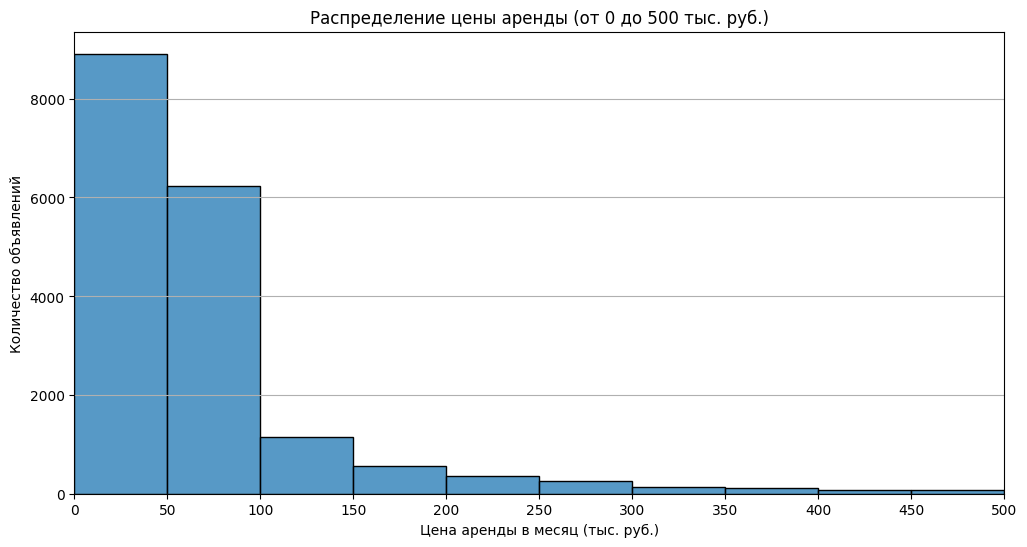

In [64]:
bins = list(range(0, 500001, 50000))

plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_month'], bins=bins, edgecolor='black')

ax = plt.gca()

ax.set_xlim(0, 500000)

def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(thousands_formatter))

ax.set_xticks(bins)

plt.title('Распределение цены аренды (от 0 до 500 тыс. руб.)')
plt.xlabel('Цена аренды в месяц (тыс. руб.)')
plt.ylabel('Количество объявлений')
plt.grid(axis='y')
plt.show()


Цена аренды в зависимости от количества комнат

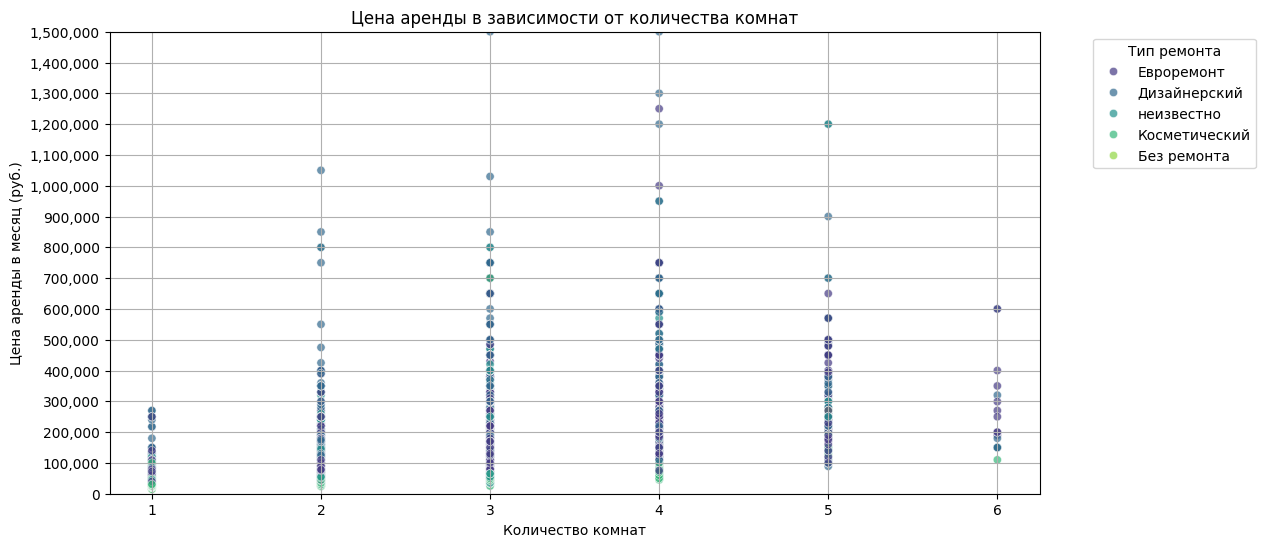

In [65]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='num_rooms', y='price_per_month', hue='renovation', palette='viridis', alpha=0.7)

plt.ylim(0, 1500000)

ax = plt.gca()
ax.yaxis.set_major_locator(mticker.MultipleLocator(100000))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Цена аренды в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена аренды в месяц (руб.)')
plt.legend(title='Тип ремонта', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


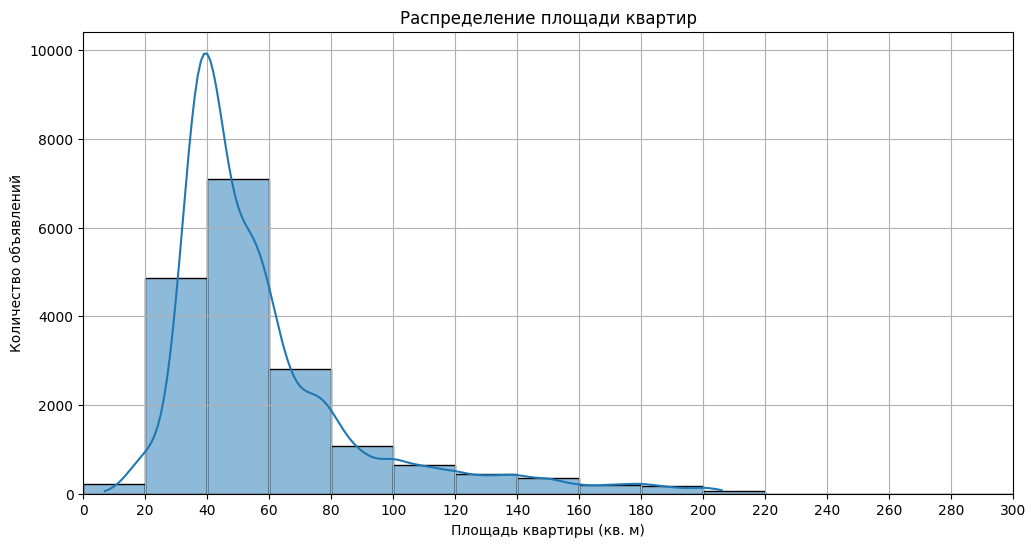

In [66]:
plt.figure(figsize=(12, 6))
bins = range(0, 301, 20)
sns.histplot(df['square_meters'], bins=bins, edgecolor='black', kde=True)

plt.xlim(0, 300)

ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Распределение площади квартир')
plt.xlabel('Площадь квартиры (кв. м)')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()


Средняя цена аренды по количеству комнат

/tmp/ipykernel_15758/2517278365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_rooms, x='num_rooms', y='price_per_month', palette='Set2', edgecolor='black')


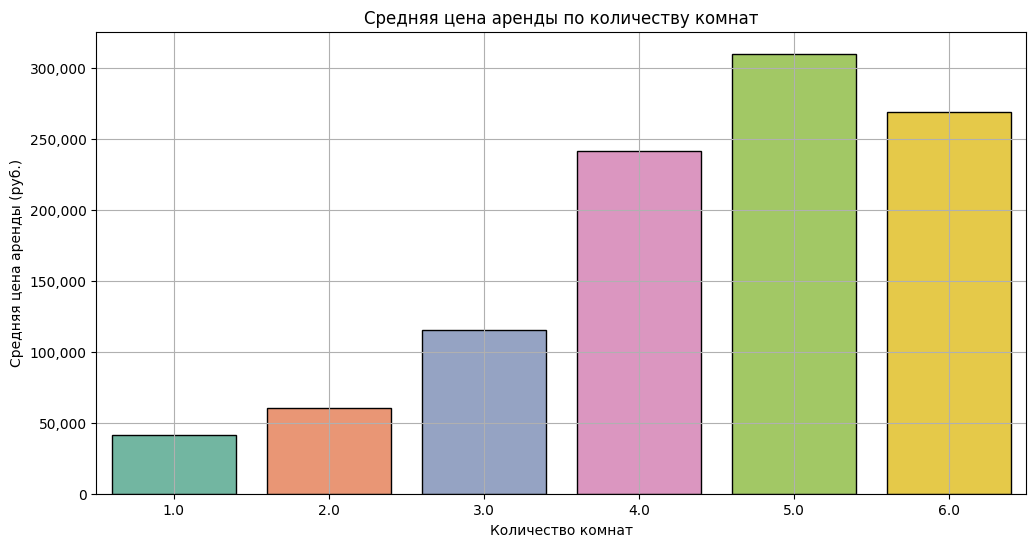

In [67]:
avg_price_by_rooms = df.groupby('num_rooms')['price_per_month'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_rooms, x='num_rooms', y='price_per_month', palette='Set2', edgecolor='black')

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Средняя цена аренды по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена аренды (руб.)')
plt.grid(True)
plt.show()


Распределение цены аренды по типу ремонта

/tmp/ipykernel_15758/3388908494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


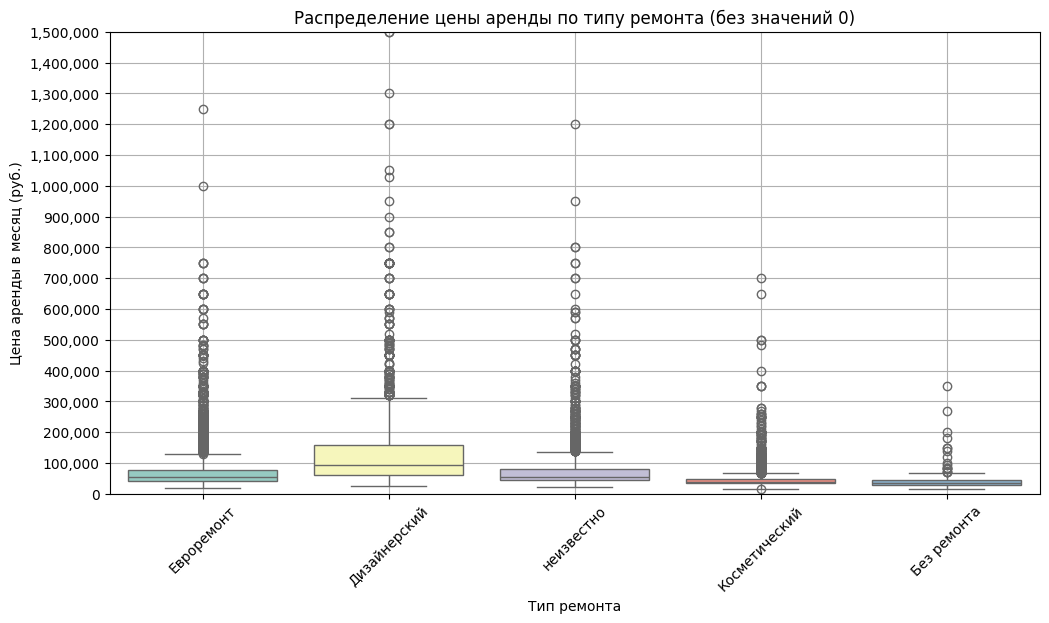

In [68]:
renovation_df = df[df['renovation'] != 0]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=renovation_df, 
    x='renovation', 
    y='price_per_month', 
    palette='Set3'
)

plt.ylim(0, 1500000)

ax = plt.gca()
ax.yaxis.set_major_locator(mticker.MultipleLocator(100000))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Распределение цены аренды по типу ремонта (без значений 0)')
plt.xlabel('Тип ремонта')
plt.ylabel('Цена аренды в месяц (руб.)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Цена аренды в зависимости от этажа квартиры

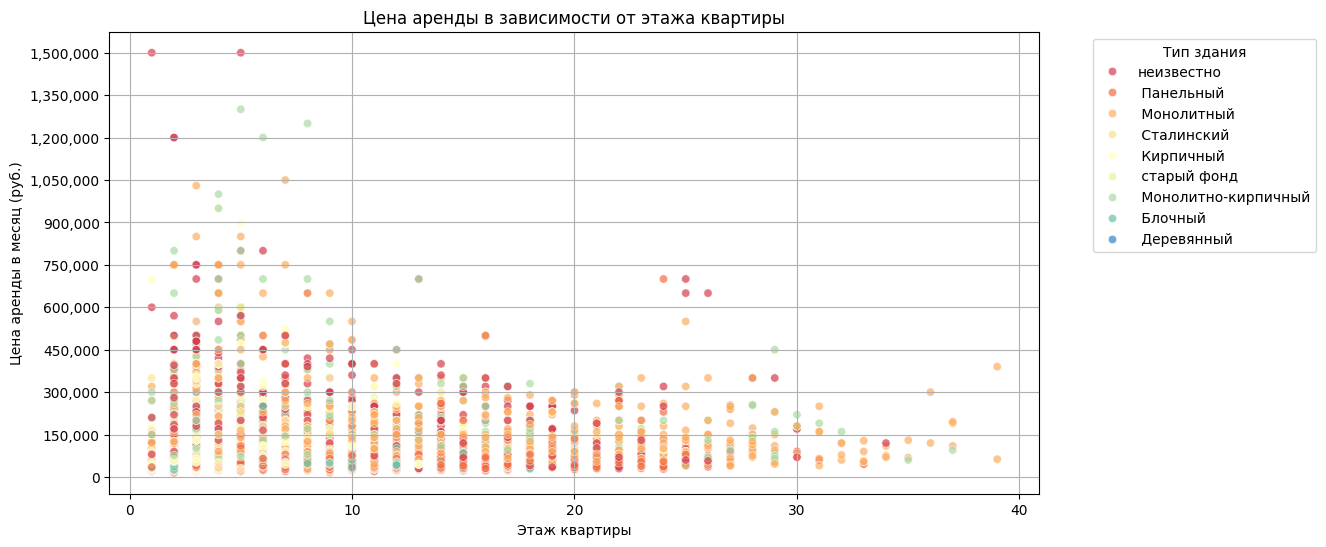

In [69]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='flat_floor', y='price_per_month', hue='type_of_building', palette='Spectral', alpha=0.7)

ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MultipleLocator(10)) 
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.yaxis.set_major_locator(mticker.MultipleLocator(150000))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Цена аренды в зависимости от этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Цена аренды в месяц (руб.)')
plt.legend(title='Тип здания', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Количество объявлений по типу парковки

/tmp/ipykernel_15758/2989857628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=parking_df, x='parking', palette='pastel', edgecolor='black')


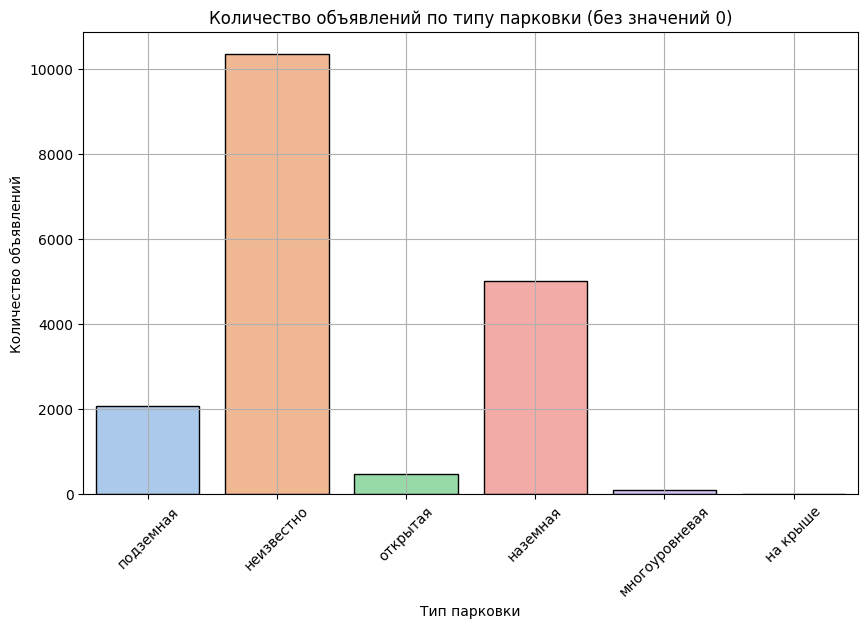

In [70]:
plt.figure(figsize=(10, 6))

parking_df = df[df['parking'] != 0]

sns.countplot(data=parking_df, x='parking', palette='pastel', edgecolor='black')

plt.title('Количество объявлений по типу парковки (без значений 0)')
plt.xlabel('Тип парковки')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Распределение количества этажей в доме

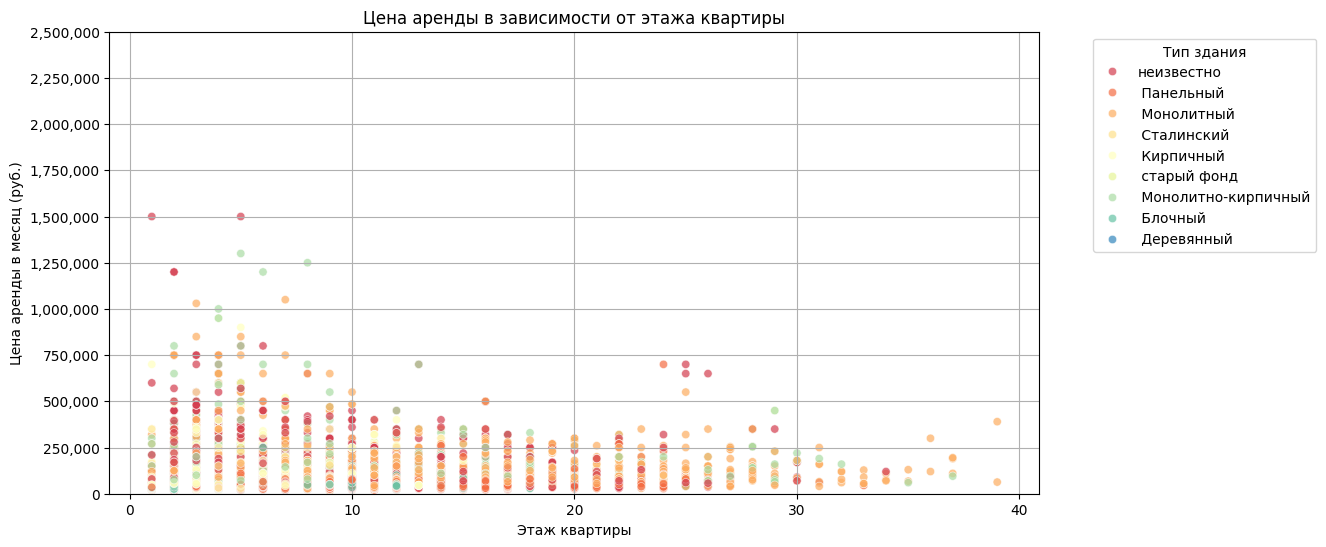

In [71]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x='flat_floor', 
    y='price_per_month', 
    hue='type_of_building', 
    palette='Spectral', 
    alpha=0.7
)

plt.ylim(0, 2500000)

ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.yaxis.set_major_locator(mticker.MultipleLocator(250000))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Цена аренды в зависимости от этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Цена аренды в месяц (руб.)')
plt.legend(title='Тип здания', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Распределение аренды по количеству комнат 

/tmp/ipykernel_15758/2298980554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_rooms', y='price_per_month', palette='Set2')


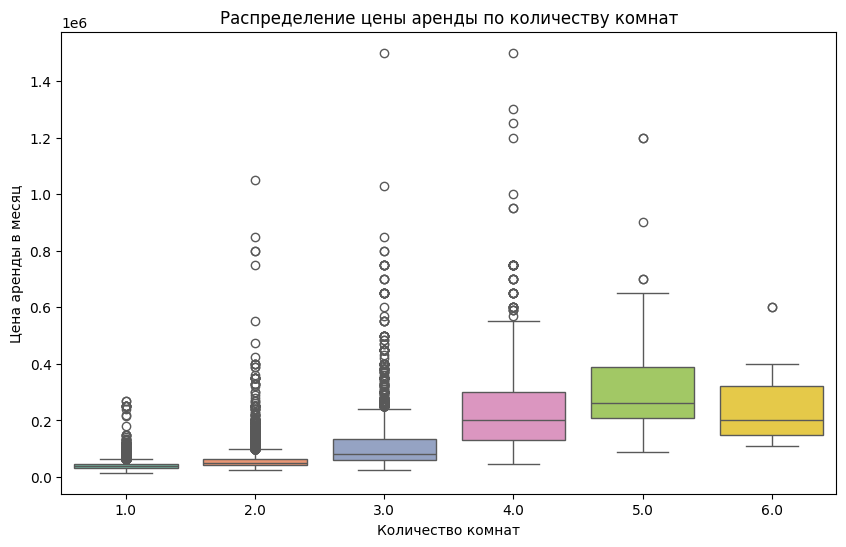

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num_rooms', y='price_per_month', palette='Set2')
plt.title('Распределение цены аренды по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена аренды в месяц')
plt.show()


Зависимоть цены аренды от высоты потолков

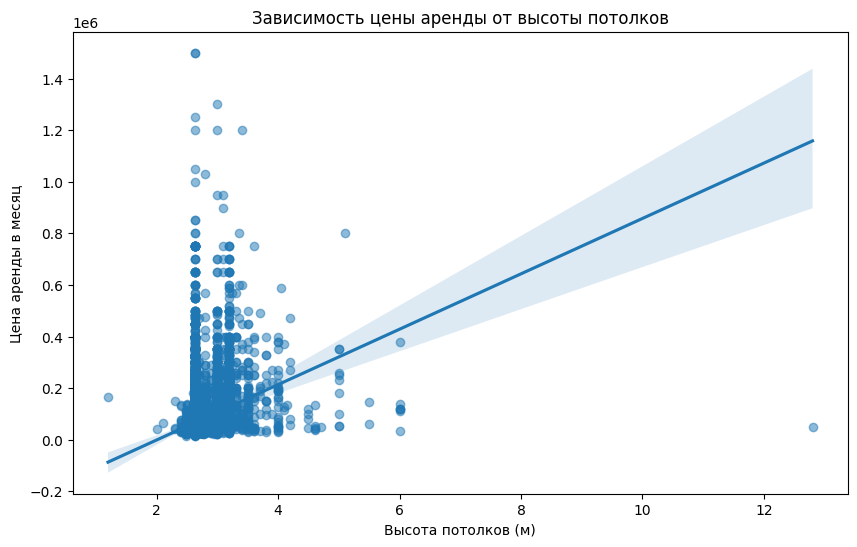

In [73]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='ceiling_height', y='price_per_month', scatter_kws={'alpha':0.5})
plt.title('Зависимость цены аренды от высоты потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Цена аренды в месяц')
plt.show()


Взаимосвязь между основными числовыми признаками

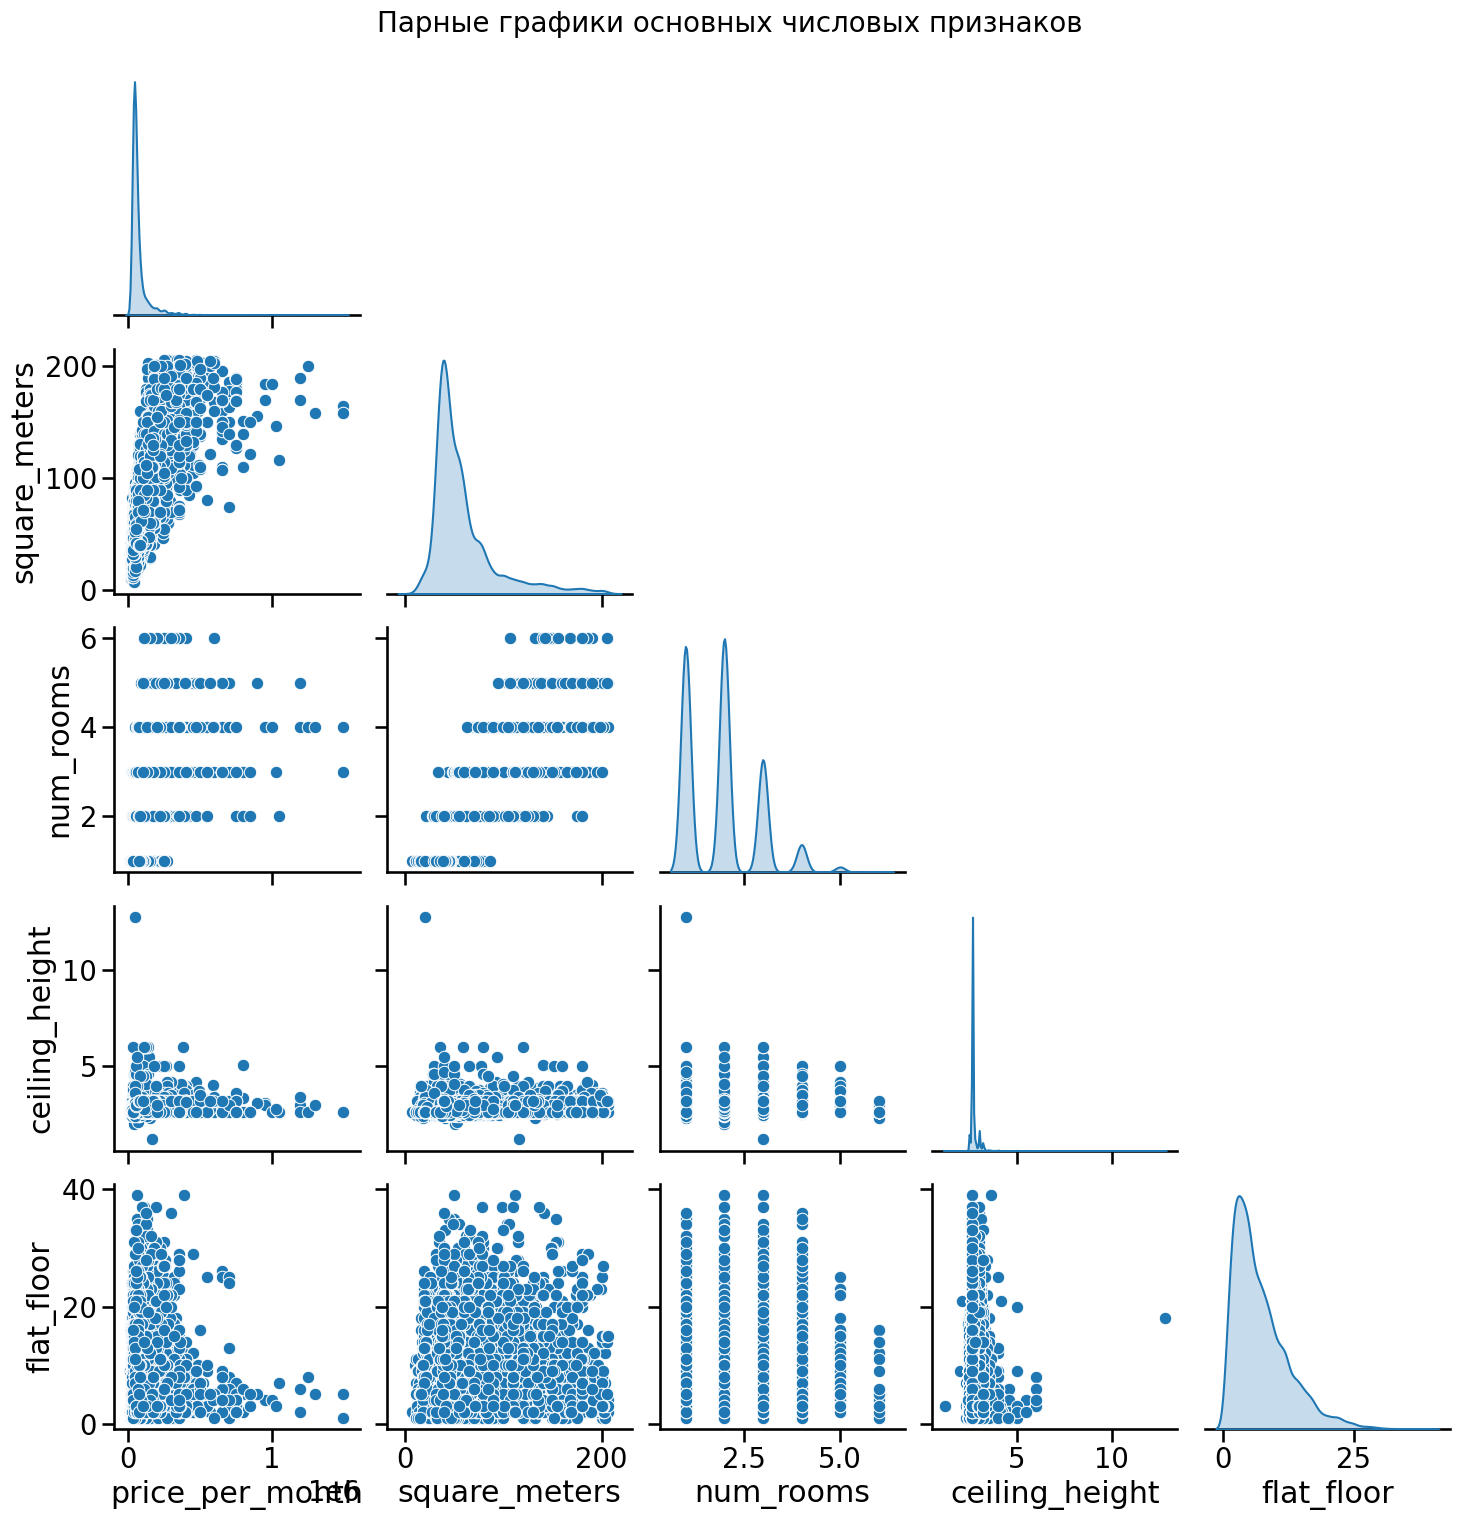

In [74]:
sns.set_context("talk", font_scale=1.2)

numeric_features = ['price_per_month', 'square_meters', 'num_rooms', 'ceiling_height', 'flat_floor']

sns.pairplot(df[numeric_features], diag_kind='kde', corner=True, height=3)

plt.suptitle('Парные графики основных числовых признаков', y=1.02, fontsize=20)
plt.show()


## **Кодировка данных**

In [75]:
# Естественно-упорядоченными данными в нашем фрейме является колонка rental period
# и renovation для нее можно использовать метод Label Encoding
le = LabelEncoder()
df['rental_period'] = le.fit_transform(df['rental_period'])
df['renovation'] = le.fit_transform(df['renovation'])

In [76]:
# Закодируем колонку metro2 и type_of_building по принципу frequency encoding, в нашем случае - это компромисс
# таблица не увелипчится в размерах, будет учитываться частота станиций, способ прост в реализации
df['metro2'] = df['metro2'].map(df['metro2'].value_counts(normalize=True))
df['type_of_building'] = df['type_of_building'].map(df['type_of_building'].value_counts(normalize=True))
df

,listing_id,num_rooms,address,square_meters,parking,renovation,ceiling_height,garbage_chute,house_size,flat_floor,type_of_building,price_per_month,deposit,utility_bills,rental_period,prepayment,metro2,balcony_count,loggia_count,combined_bathroom_count,separated_bathroom_count,windows_street,windows_yard,kids_allowded,pets_allowded,is_dishwasher,is_internet,is_air_conditioner,is_bathtub,is_shower,is_tv,is_furniture_in_kitchen,is_washing_machine,is_furniture_in_rooms,is_fridge,is_phone,passenger_elevator_capacity,cargo_elevator_capacity,square_meters_rounded
0,271173086,4.0,"Москва, улица Новый Арбат, 27",200.0,подземная,2,3.20,0,16,5,0.132044,500000.0,500000.0,0.0,0,1.0,0.006075,0,0,3,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,200.0
1,272197456,4.0,"Москва, переулок Плотников, 21С1",170.0,подземная,2,3.20,0,6,5,0.132044,400000.0,400000.0,0.0,0,1.0,0.006075,0,0,3,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,170.0
2,273614615,2.0,"Москва, улица Новый Арбат, 15",58.0,неизвестно,2,3.90,1,26,12,0.355220,225000.0,225000.0,0.0,0,1.0,0.003790,0,0,2,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,60.0
3,274837728,3.0,"Москва, 1-й Смоленский переулок, 21",92.0,неизвестно,1,2.64,0,7,3,0.132044,470000.0,470000.0,0.0,0,2.0,0.006075,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,90.0
5,274475342,3.0,"Москва, улица Арбат, 43С3",98.0,подземная,2,3.20,0,4,2,0.178530,250000.0,250000.0,0.0,0,1.0,0.006075,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19312,274022183,2.0,"Москва, улица Юннатов, 8А",55.0,неизвестно,4,3.00,0,5,3,0.192408,55000.0,55000.0,0.0,0,1.0,0.002898,1,0,1,0,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,55.0
19313,273740457,1.0,"Москва, шоссе Энтузиастов, 3к1",39.1,подземная,2,3.20,0,13,5,0.040633,71990.0,71990.0,0.0,0,1.0,0.003456,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0
19314,268431127,2.0,"Москва, шоссе Энтузиастов, 3к1",40.4,подземная,2,3.20,0,13,2,0.040633,76300.0,76300.0,0.0,0,1.0,0.003456,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0
19315,274187029,2.0,"Москва, шоссе Энтузиастов, 3к1",40.4,подземная,2,3.20,0,13,8,0.040633,78700.0,78700.0,0.0,0,1.0,0.003456,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0


In [77]:
df_encoded = pd.get_dummies(df['parking'], prefix='parking')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1, ignore_index=False)
df

,listing_id,num_rooms,address,square_meters,parking,renovation,ceiling_height,garbage_chute,house_size,flat_floor,type_of_building,price_per_month,deposit,utility_bills,rental_period,prepayment,metro2,balcony_count,loggia_count,combined_bathroom_count,separated_bathroom_count,windows_street,windows_yard,kids_allowded,pets_allowded,is_dishwasher,is_internet,is_air_conditioner,is_bathtub,is_shower,is_tv,is_furniture_in_kitchen,is_washing_machine,is_furniture_in_rooms,is_fridge,is_phone,passenger_elevator_capacity,cargo_elevator_capacity,square_meters_rounded,parking_многоуровневая,parking_на крыше,parking_наземная,parking_неизвестно,parking_открытая,parking_подземная
0,271173086,4.0,"Москва, улица Новый Арбат, 27",200.0,подземная,2,3.20,0,16,5,0.132044,500000.0,500000.0,0.0,0,1.0,0.006075,0,0,3,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,200.0,0,0,0,0,0,1
1,272197456,4.0,"Москва, переулок Плотников, 21С1",170.0,подземная,2,3.20,0,6,5,0.132044,400000.0,400000.0,0.0,0,1.0,0.006075,0,0,3,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,170.0,0,0,0,0,0,1
2,273614615,2.0,"Москва, улица Новый Арбат, 15",58.0,неизвестно,2,3.90,1,26,12,0.355220,225000.0,225000.0,0.0,0,1.0,0.003790,0,0,2,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,60.0,0,0,0,1,0,0
3,274837728,3.0,"Москва, 1-й Смоленский переулок, 21",92.0,неизвестно,1,2.64,0,7,3,0.132044,470000.0,470000.0,0.0,0,2.0,0.006075,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,90.0,0,0,0,1,0,0
5,274475342,3.0,"Москва, улица Арбат, 43С3",98.0,подземная,2,3.20,0,4,2,0.178530,250000.0,250000.0,0.0,0,1.0,0.006075,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,100.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19312,274022183,2.0,"Москва, улица Юннатов, 8А",55.0,неизвестно,4,3.00,0,5,3,0.192408,55000.0,55000.0,0.0,0,1.0,0.002898,1,0,1,0,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,55.0,0,0,0,1,0,0
19313,273740457,1.0,"Москва, шоссе Энтузиастов, 3к1",39.1,подземная,2,3.20,0,13,5,0.040633,71990.0,71990.0,0.0,0,1.0,0.003456,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0,0,0,0,0,0,1
19314,268431127,2.0,"Москва, шоссе Энтузиастов, 3к1",40.4,подземная,2,3.20,0,13,2,0.040633,76300.0,76300.0,0.0,0,1.0,0.003456,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0,0,0,0,0,0,1
19315,274187029,2.0,"Москва, шоссе Энтузиастов, 3к1",40.4,подземная,2,3.20,0,13,8,0.040633,78700.0,78700.0,0.0,0,1.0,0.003456,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,40.0,0,0,0,0,0,1


In [78]:
df = df.rename(columns={'metro2': 'metro', 'parking_многоуровневая': 'parking_mult_lev', 'parking_на крыше': 'roof_parking', 'parking_наземная': 'ground_parking', 'parking_неизвестно': 'parking_unknown', 'parking_открытая': 'parking_open', 'parking_подземная': 'undergr_parking'})
df.drop(columns=['address', 'parking'], inplace=True)


In [79]:
df.dtypes

listing_id                       int64
num_rooms                      float64
square_meters                  float64
renovation                       int64
ceiling_height                 float64
garbage_chute                    int64
house_size                       int64
flat_floor                       int64
type_of_building               float64
price_per_month                float64
deposit                        float64
utility_bills                  float64
rental_period                    int64
prepayment                     float64
metro                          float64
balcony_count                    int64
loggia_count                     int64
combined_bathroom_count          int64
separated_bathroom_count         int64
windows_street                   int64
windows_yard                     int64
kids_allowded                    int64
pets_allowded                    int64
is_dishwasher                    int64
is_internet                      int64
is_air_conditioner       

In [80]:
df.to_csv('dockerteam_data.csv')